Using Theano backend.


6711
(6711L, 1225L)
(6711L,)
('X_train shape:', (5368L, 1L, 35L, 35L))
(5368L, 'train samples')
(1343L, 'test samples')
Using real-time data augmentation.
Epoch 1/10
5368/5368 [==============================] - 95s - loss: 0.2412 - acc: 0.8757 - val_loss: 0.2416 - val_acc: 0.8750
Epoch 2/10
5368/5368 [==============================] - 94s - loss: 0.2276 - acc: 0.8788 - val_loss: 0.2294 - val_acc: 0.8743
Epoch 3/10
5368/5368 [==============================] - 93s - loss: 0.2247 - acc: 0.8802 - val_loss: 0.2271 - val_acc: 0.8745
Epoch 4/10
5368/5368 [==============================] - 93s - loss: 0.2240 - acc: 0.8801 - val_loss: 0.2344 - val_acc: 0.8750
Epoch 5/10
5368/5368 [==============================] - 92s - loss: 0.2228 - acc: 0.8808 - val_loss: 0.2229 - val_acc: 0.8802
Epoch 6/10
5368/5368 [==============================] - 92s - loss: 0.2232 - acc: 0.8801 - val_loss: 0.2230 - val_acc: 0.8731
Epoch 7/10
5368/5368 [==============================] - 93s - loss: 0.2234 - acc: 0.8804 

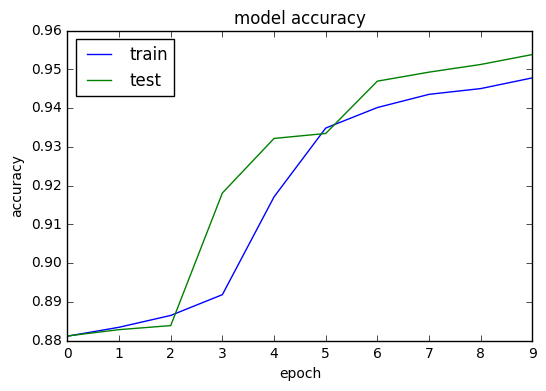

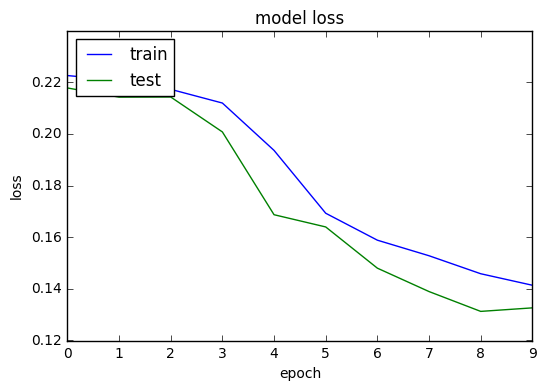

('Test score:', 0.13507294407418124)
('Test accuracy:', 0.9534623976172748)
Baseline Error: 4.65%
1343/1343 [==============================] - 7s     
[5 5 5 ..., 4 4 4]
1343/1343 [==============================] - 7s     


C:\Users\dundeva\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    precision    recall  f1-score   support

    class 0(Anger)       0.00      0.00      0.00        25
 class 1(Contempt)       0.00      0.00      0.00         2
  class 2(Disgust)       0.00      0.00      0.00         7
     class 3(Fear)       0.27      0.33      0.30         9
class 4(Happiness)       0.85      0.86      0.85       534
  class 5(Nuetral)       0.81      0.90      0.85       700
  class 6(Sadness)       0.25      0.04      0.07        25
 class 7(Surprise)       0.17      0.02      0.04        41

       avg / total       0.77      0.82      0.79      1343

[[  0   0   0   1   5  19   0   0]
 [  0   0   0   0   1   1   0   0]
 [  0   0   0   2   1   4   0   0]
 [  0   0   0   3   1   2   2   1]
 [  0   0   0   0 459  75   0   0]
 [  0   0   0   1  64 632   1   2]
 [  0   0   0   4   3  15   1   2]
 [  0   0   0   0   7  33   0   1]]
1343/1343 [==============================] - 7s     


col_0   0  1  2  3    4    5   6   7
row_0                               
3       1  0  2  3    0    1   4   0
4       5  1  1  1  459   64   3   7
5      19  1  4  2   75  632  15  33
6       0  0  0  2    0    1   1   0
7       0  0  0  1    0    2   2   1

In [1]:
from keras import backend as K
K.set_image_dim_ordering('th')
import pandas as pd
from keras.regularizers import l2
from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam,Adadelta, Adagrad
from keras.utils import np_utils
from sklearn.metrics import classification_report,confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.advanced_activations import LeakyReLU
from matplotlib import pyplot
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
import theano
from PIL import Image
from numpy import *

# input image dimensions
img_rows, img_cols =35,35

# number of channels
img_channels =1


#  data
path1 = 'C:/Users/dundeva/Documents/CroppedImages'    #path of folder of images    
path2 = 'C:/Users/dundeva/Documents/AugmentedImages/data/train'  #path of folder of saved images  

listing = os.listdir(path1) 
num_samples=size(listing)
print num_samples


for file in listing:
    im = Image.open(path1 + '//' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                           
    gray.save(path2 +'//' +  file)

imlist = os.listdir(path1)

im1 = array(Image.open('C:/Users/dundeva/Documents/AugmentedImages/data/train' + '//'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open('C:/Users/dundeva/Documents/AugmentedImages/data/train'+ '//' + im2)).flatten()
              for im2 in imlist],'f')
#Labels
label=np.ones((num_samples,),dtype = int)
label[0:129]=0#Anger
label[129:136]=1#Contempt
label[136:168]=2#Disgust
label[168:211]=3#Fear
label[211:2812]=4#Happiness
label[2812:6393]=5#Nuetral
label[6393:6505]=6#Sadness
label[6505:6711]=7#Surprise

#shuffle  images and labels
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]
data_augmentation = True
print (train_data[0].shape)
print (train_data[1].shape)

#batch_size to train
batch_size = 125

# number of output classes
nb_classes =8

# number of epochs to train
nb_epoch =10

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
nb_pool = 3

# convolution kernel size
nb_conv = 3

(X, y) = (train_data[0],train_data[1])

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

   
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary classes
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


    
#CNN layers
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

#Compile Model 

# let's train the model using SGD + momentum (how original).
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=["accuracy"])

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=True,  # apply ZCA whitening
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.75,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        channel_shift_range=0.75,# random channel shifts
        shear_range=0.5,#Shear angle in counter-clockwise direction
        zoom_range=0.8,# random zoom
        rescale=0.2
    )  

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
    model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1,validation_split=0.2 )#validation_data=(X_test, Y_test)

#Evaluate test set
score = model.evaluate(X_test, Y_test, verbose=0)

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('Test score:', score[0])
print('Test accuracy:', score[1])
print("Baseline Error: %.2f%%" % (100-score[1]*100))
#print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test, show_accuracy=True)[1])

y_pred = model.predict_classes(X_test)
print(y_pred)

p=model.predict_proba(X_test) # to predict probability

target_names = ['class 0(Anger)', 'class 1(Contempt)', 'class 2(Disgust)', 
                'class 3(Fear)', 'class 4(Happiness)', 'class 5(Nuetral)'
               , 'class 6(Sadness)', 'class 7(Surprise)']

print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

# Confusion Matrix
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)
